In [30]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [32]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [33]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [34]:
tf.keras.backend.clear_session()

In [35]:
subject = 'Amapá - Consumo de Cimento (t)'
start_index = 0
split_index = 179 #Referente aos 230 anos de input 
window_size = 36
train_split = split_index + 1 - 12

In [36]:
data = pd.read_csv('2003_raw_Amapá_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Amapá - PIB - Per Capita,Amapá - PIB - Preços de Mercado,Amapá - PIB - Estadual,Amapá - PIB - Construção Civil,Amapá - População,Amapá - INCC (%),Amapá - IPCA - Variação mensal durante o Plano Real (%),Amapá - IGP-DI,Amapá - Taxa Selic (%),Amapá - IDH - Longevidade,Amapá - IDH - Renda,Amapá - IDH - Educação,Amapá - NFSP - Fluxo Mensal (Milhões de reais),Amapá - Estoque liquido de capital fixo - (R$),Amapá - Desemprego,Amapá - Produção de Cimento (t),Amapá - Valor,Amapá - Consumo de Cimento (t)
0,2003-01-01,470809.497815,2.478276e+05,0.911519,313641.830877,516511.0,1.70,12.53,2.70,0.082293,0.711,0.638,0.424,3.46,6.098524e+06,20.539464,NaN,NaN,10392.0
1,2003-02-01,470809.497815,2.478276e+05,0.911519,313641.830877,516511.0,1.51,2.25,2.17,0.088771,0.711,0.638,0.424,3.59,6.172460e+06,20.539464,NaN,NaN,6857.0
2,2003-03-01,470809.497815,2.478276e+05,0.911519,313641.830877,516511.0,1.39,3.86,1.59,0.090733,0.711,0.638,0.424,3.84,6.172460e+06,20.539464,NaN,NaN,7011.0
3,2003-04-01,470809.497815,2.478276e+05,0.911519,313641.830877,516511.0,1.38,5.13,1.66,0.092749,0.711,0.638,0.424,3.95,6.172460e+06,20.539464,40887.0,NaN,7122.0
4,2003-05-01,470809.497815,2.478276e+05,0.911519,313641.830877,516511.0,0.90,6.15,0.41,0.092758,0.711,0.638,0.424,4.06,6.172460e+06,20.539464,92683.0,NaN,5267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,773653.345154,1.305418e+06,0.932681,371693.807587,829494.0,0.58,2.42,-0.01,0.024620,0.820,0.700,0.710,0.69,7.827728e+06,12.300000,574792.0,NaN,11342.0
200,2019-09-01,773653.345154,1.305418e+06,0.932681,371693.807587,829494.0,0.42,2.54,-0.51,0.022751,0.820,0.700,0.710,0.62,7.827728e+06,12.000000,27345.0,NaN,13110.0
201,2019-10-01,773653.345154,1.305418e+06,0.932681,371693.807587,829494.0,0.46,2.49,0.50,0.022035,0.820,0.700,0.710,0.59,7.827728e+06,11.900000,220634.0,NaN,13195.0
202,2019-11-01,773653.345154,1.305418e+06,0.932681,371693.807587,829494.0,0.18,2.60,0.55,0.020790,0.820,0.700,0.710,0.57,7.827728e+06,11.700000,118005.0,NaN,10053.0


In [37]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      9.759
1      4.782
2      7.803
3      4.400
4      4.460
       ...  
199      NaN
200      NaN
201      NaN
202      NaN
203      NaN
Name: Amapá - Consumo de Cimento (t), Length: 204, dtype: float64

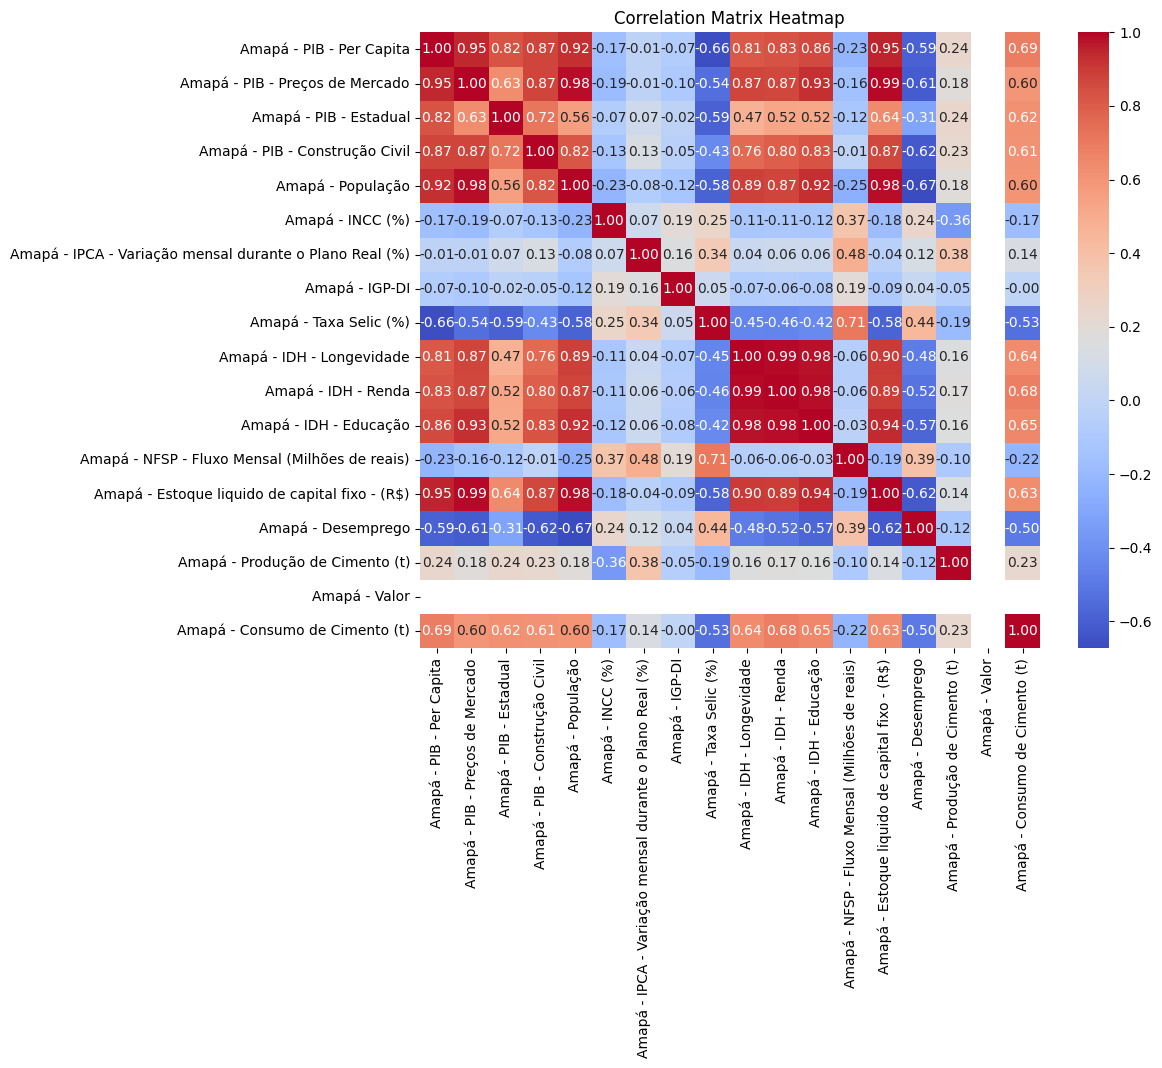

In [38]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [39]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Amapá - PIB - Per Capita,Amapá - PIB - Preços de Mercado,Amapá - PIB - Estadual,Amapá - PIB - Construção Civil,Amapá - População,Amapá - INCC (%),Amapá - IPCA - Variação mensal durante o Plano Real (%),Amapá - IGP-DI,Amapá - Taxa Selic (%),Amapá - IDH - Longevidade,Amapá - IDH - Renda,Amapá - IDH - Educação,Amapá - NFSP - Fluxo Mensal (Milhões de reais),Amapá - Estoque liquido de capital fixo - (R$),Amapá - Desemprego,Amapá - Produção de Cimento (t),Amapá - Valor
0,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,1.998868,4.052332,3.466715,2.303195,-0.931358,-0.934856,-0.920413,3.108599,-1.539424,2.141455,-1.000000,-1.0
1,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,1.647487,-0.596188,2.630940,2.745235,-0.931358,-0.934856,-0.920413,3.275709,-1.411460,2.141455,-1.000000,-1.0
2,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,1.425561,0.131839,1.716318,2.879123,-0.931358,-0.934856,-0.920413,3.597074,-1.411460,2.141455,-1.000000,-1.0
3,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,1.407068,0.706121,1.826703,3.016721,-0.931358,-0.934856,-0.920413,3.738475,-1.411460,2.141455,-0.852677,-1.0
4,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,0.519367,1.167355,-0.144465,3.017322,-0.931358,-0.934856,-0.920413,3.879875,-1.411460,2.141455,-0.567260,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.838192,1.619125,-0.412287,0.263628,1.609402,-0.590259,-0.966985,-1.264088,-0.729479,1.278759,0.944493,1.323094,-0.374997,1.441346,-0.063552,1.673027,-1.0
176,0.838192,1.619125,-0.412287,0.263628,1.609402,-0.479297,-0.881068,-0.412544,-0.941281,1.278759,0.944493,1.323094,-0.439270,1.441346,-0.063552,-0.840152,-1.0
177,0.838192,1.619125,-0.412287,0.263628,1.609402,-1.034110,-0.808718,0.186692,-1.140710,1.278759,0.944493,1.323094,-0.503543,1.441346,-0.063552,-0.249910,-1.0
178,0.838192,1.619125,-0.412287,0.263628,1.609402,-0.571766,-0.614276,-0.633314,-1.226481,1.278759,0.944493,1.323094,-0.503543,1.441346,-0.038029,-0.422243,-1.0


In [40]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Amapá - PIB - Per Capita,Amapá - PIB - Preços de Mercado,Amapá - PIB - Estadual,Amapá - PIB - Construção Civil,Amapá - População,Amapá - INCC (%),Amapá - IPCA - Variação mensal durante o Plano Real (%),Amapá - IGP-DI,Amapá - Taxa Selic (%),Amapá - IDH - Longevidade,Amapá - IDH - Renda,Amapá - IDH - Educação,Amapá - NFSP - Fluxo Mensal (Milhões de reais),Amapá - Estoque liquido de capital fixo - (R$),Amapá - Desemprego,Amapá - Produção de Cimento (t),Amapá - Valor
0,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,1.998868,4.052332,3.466715,2.303195,-0.931358,-0.934856,-0.920413,3.108599,-1.539424,2.141455,-1.000000,-1.0
1,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,1.647487,-0.596188,2.630940,2.745235,-0.931358,-0.934856,-0.920413,3.275709,-1.411460,2.141455,-1.000000,-1.0
2,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,1.425561,0.131839,1.716318,2.879123,-0.931358,-0.934856,-0.920413,3.597074,-1.411460,2.141455,-1.000000,-1.0
3,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,1.407068,0.706121,1.826703,3.016721,-0.931358,-0.934856,-0.920413,3.738475,-1.411460,2.141455,-0.852677,-1.0
4,-1.318037,-1.300647,-0.394906,-0.893595,-1.581240,0.519367,1.167355,-0.144465,3.017322,-0.931358,-0.934856,-0.920413,3.879875,-1.411460,2.141455,-0.567260,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.058784,1.458367,0.242587,1.862234,1.421937,-0.238878,0.629248,-1.406012,0.272188,1.075996,1.089059,1.244650,0.794771,1.416222,-0.829227,-1.000000,-1.0
164,1.058784,1.458367,0.242587,1.862234,1.421937,-0.608753,0.837256,-0.112926,0.272188,1.075996,1.089059,1.244650,0.730498,1.416222,-0.803704,-1.000000,-1.0
165,1.058784,1.458367,0.242587,1.862234,1.421937,-0.534778,0.877953,-0.743700,0.272188,1.075996,1.089059,1.244650,0.743353,1.416222,-0.778182,-1.000000,-1.0
166,1.058784,1.458367,0.242587,1.862234,1.421937,-0.756703,1.000045,-0.586006,0.248413,1.075996,1.089059,1.244650,0.614807,1.416222,-0.778182,-1.000000,-1.0


In [41]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       9.759
1       4.782
2       7.803
3       4.400
4       4.460
        ...  
163     9.724
164    10.069
165    13.930
166    11.918
167    11.757
Name: Amapá - Consumo de Cimento (t), Length: 168, dtype: float64

In [42]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [43]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [44]:
# input para treinamento
test_input = input_data.iloc[train_split-window_size:split_index + 1]
test_input

,Amapá - PIB - Per Capita,Amapá - PIB - Preços de Mercado,Amapá - PIB - Estadual,Amapá - PIB - Construção Civil,Amapá - População,Amapá - INCC (%),Amapá - IPCA - Variação mensal durante o Plano Real (%),Amapá - IGP-DI,Amapá - Taxa Selic (%),Amapá - IDH - Longevidade,Amapá - IDH - Renda,Amapá - IDH - Educação,Amapá - NFSP - Fluxo Mensal (Milhões de reais),Amapá - Estoque liquido de capital fixo - (R$),Amapá - Desemprego,Amapá - Produção de Cimento (t),Amapá - Valor
132,1.440408,1.142670,1.527199,0.950727,1.041594,-0.960135,1.058830,0.297077,-0.755853,0.873233,1.089059,1.323094,-0.285015,0.834026,-1.237587,2.754609,-1.0
133,1.440408,1.142670,1.527199,0.950727,1.041594,0.482379,-1.364912,-0.160234,-0.688658,0.873233,1.089059,1.323094,-0.349288,1.129318,-1.109974,-1.000000,-1.0
134,1.440408,1.142670,1.527199,0.950727,1.041594,-0.534778,-1.052901,0.549386,-0.626634,0.873233,1.089059,1.323094,-0.374997,1.129318,-1.033407,-1.000000,-1.0
135,1.440408,1.142670,1.527199,0.950727,1.041594,-0.627247,-0.627842,1.542855,-0.571481,0.873233,1.089059,1.323094,-0.259306,1.129318,-1.084452,-1.000000,-1.0
136,1.440408,1.142670,1.527199,0.950727,1.041594,0.482379,-0.320352,-0.081387,-0.516512,0.873233,1.089059,1.323094,-0.053632,1.129318,-1.135497,0.022728,-1.0
137,1.440408,1.142670,1.527199,0.950727,1.041594,2.646150,-0.107822,-1.500628,-0.510405,0.873233,1.089059,1.323094,0.023495,1.129318,-1.186542,-1.000000,-1.0
138,1.440408,1.142670,1.527199,0.950727,1.041594,0.075516,0.082098,-1.784477,-0.510405,0.873233,1.089059,1.323094,-0.002214,1.129318,-1.212064,-1.000000,-1.0
139,1.440408,1.142670,1.527199,0.950727,1.041594,0.241960,0.086620,-1.658322,-0.510405,0.873233,1.089059,1.323094,-0.143614,1.129318,-1.263109,-1.000000,-1.0
140,1.440408,1.142670,1.527199,0.950727,1.041594,-0.997122,0.204189,-0.696392,-0.510054,0.873233,1.089059,1.323094,-0.182178,1.129318,-1.314154,-0.478091,-1.0
141,1.440408,1.142670,1.527199,0.950727,1.041594,-0.867666,0.470982,-0.759469,-0.510405,0.873233,1.089059,1.323094,-0.105051,1.129318,-1.365199,-1.000000,-1.0


In [45]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [46]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [47]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(144, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.07,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [48]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [49]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[331228000, 1268764104, 631980222, 208233349, 2160779853, 502185110, 1346641554, 3379169062, 143233712, 1484866147]


Step: 0 ___________________________________________
val_loss: 2.1123557090759277
winner_seed: 331228000


Step: 1 ___________________________________________
val_loss: 3.6771578788757324


Step: 2 ___________________________________________


2023-11-15 14:04:47.650305: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


val_loss: 4.384702682495117


Step: 3 ___________________________________________
val_loss: 5.8622894287109375


Step: 4 ___________________________________________
val_loss: 4.320374965667725


Step: 5 ___________________________________________
val_loss: 4.727723121643066


Step: 6 ___________________________________________
val_loss: 4.0790510177612305


Step: 7 ___________________________________________
val_loss: 5.363465785980225


Step: 8 ___________________________________________
val_loss: 3.5833308696746826


Step: 9 ___________________________________________
val_loss: 5.217342853546143


final_seed: 331228000


In [50]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 2963195227

Epoch 1/10000
4/4 [==============================] - 2s 110ms/step - loss: 220.8751 - val_loss: 11.8471
Epoch 2/10000
4/4 [==============================] - 0s 7ms/step - loss: 55.3105 - val_loss: 24.6740
Epoch 3/10000
4/4 [==============================] - 0s 7ms/step - loss: 34.2851 - val_loss: 22.7095
Epoch 4/10000
4/4 [==============================] - 0s 7ms/step - loss: 30.7023 - val_loss: 35.9696
Epoch 5/10000
4/4 [==============================] - 0s 7ms/step - loss: 34.7448 - val_loss: 22.5582
Epoch 6/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.5291 - val_loss: 33.0071
Epoch 7/10000
4/4 [==============================] - 0s 7ms/step - loss: 25.6114 - val_loss: 33.4156
Epoch 8/10000
4/4 [==============================] - 0s 7ms/step - loss: 20.9597 - val_loss: 11.0155
Epoch 9/10000
4/4 [==============================] - 0s 7ms/step - loss: 17.4252 - val_loss: 7.9560
Epoch 10/10000
4/4 [==============================] - 0s 8ms/step - loss: 19.3000 - val_l

4/4 [==============================] - 0s 7ms/step - loss: 11.3217 - val_loss: 5.3864
Epoch 83/10000
4/4 [==============================] - 0s 7ms/step - loss: 11.3277 - val_loss: 5.9337
Epoch 84/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.4577 - val_loss: 4.2590
Epoch 85/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.7098 - val_loss: 3.6196
Epoch 86/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.1405 - val_loss: 4.0438
Epoch 87/10000
4/4 [==============================] - 0s 8ms/step - loss: 10.2584 - val_loss: 4.0858
Epoch 88/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.8188 - val_loss: 8.4201
Epoch 89/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.5245 - val_loss: 3.4641
Epoch 90/10000
4/4 [==============================] - 0s 7ms/step - loss: 9.4389 - val_loss: 4.8653
Epoch 91/10000
4/4 [==============================] - 0s 7ms/step - loss: 8.9489 - val_loss: 4.0147
Epoch 92/10

4/4 [==============================] - 0s 7ms/step - loss: 6.8150 - val_loss: 3.9477
Epoch 245/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.6246 - val_loss: 3.7980
Epoch 246/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.5059 - val_loss: 4.8367
Epoch 247/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.3829 - val_loss: 4.4985
Epoch 248/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.6828 - val_loss: 3.7617
Epoch 249/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.7372 - val_loss: 4.3165
Epoch 250/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.6721 - val_loss: 4.2640
Epoch 251/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.5487 - val_loss: 5.1191
Epoch 252/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.1715 - val_loss: 4.1324
Epoch 253/10000
4/4 [==============================] - 0s 7ms/step - loss: 6.1816 - val_loss: 4.6540
Epoch 

4/4 [==============================] - 0s 7ms/step - loss: 5.2153 - val_loss: 3.9270
Epoch 407/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.1792 - val_loss: 3.9141
Epoch 408/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.1487 - val_loss: 4.0927
Epoch 409/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.9547 - val_loss: 4.4357
Epoch 410/10000
4/4 [==============================] - 0s 7ms/step - loss: 5.2768 - val_loss: 3.9614
Epoch 411/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.9265 - val_loss: 4.3580
Epoch 412/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.9448 - val_loss: 4.1039
Epoch 413/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.9445 - val_loss: 4.0957
Epoch 414/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.9929 - val_loss: 4.0721
Epoch 415/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.1394 - val_loss: 4.1126
Epoch 

4/4 [==============================] - 0s 7ms/step - loss: 4.1729 - val_loss: 4.0979
Epoch 569/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.4284 - val_loss: 4.4506
Epoch 570/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.3991 - val_loss: 4.3256
Epoch 571/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.3673 - val_loss: 3.9424
Epoch 572/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.3615 - val_loss: 3.9341
Epoch 573/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.3892 - val_loss: 3.8053
Epoch 574/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.1948 - val_loss: 4.0780
Epoch 575/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.0873 - val_loss: 4.2477
Epoch 576/10000
4/4 [==============================] - 0s 7ms/step - loss: 4.5939 - val_loss: 3.8447
Epoch 577/10000
4/4 [==============================] - 0s 7ms/step - loss: 3.8722 - val_loss: 4.0631
Epoch 

4/4 [==============================] - 0s 8ms/step - loss: 3.9714 - val_loss: 3.4293
Epoch 731/10000
4/4 [==============================] - 0s 8ms/step - loss: 4.0871 - val_loss: 3.7167
Epoch 732/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.6600 - val_loss: 3.5081
Epoch 733/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.4102 - val_loss: 3.5913
Epoch 734/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.5870 - val_loss: 3.7966
Epoch 735/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.6840 - val_loss: 3.8078
Epoch 736/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.3917 - val_loss: 3.6033
Epoch 737/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.3293 - val_loss: 3.5404
Epoch 738/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.8191 - val_loss: 3.5509
Epoch 739/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.5352 - val_loss: 3.6058
Epoch 

4/4 [==============================] - 0s 8ms/step - loss: 2.9330 - val_loss: 3.4585
Epoch 893/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.9149 - val_loss: 3.8676
Epoch 894/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.1841 - val_loss: 3.4421
Epoch 895/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.2748 - val_loss: 3.6900
Epoch 896/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.1468 - val_loss: 3.9083
Epoch 897/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.9000 - val_loss: 3.4126
Epoch 898/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.7699 - val_loss: 3.5120
Epoch 899/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.8300 - val_loss: 3.2212
Epoch 900/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.7254 - val_loss: 3.6147
Epoch 901/10000
4/4 [==============================] - 0s 8ms/step - loss: 3.1629 - val_loss: 3.6438
Epoch 

4/4 [==============================] - 0s 8ms/step - loss: 2.4428 - val_loss: 3.5372
Epoch 1054/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.1743 - val_loss: 4.2004
Epoch 1055/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.3145 - val_loss: 4.0936
Epoch 1056/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.6023 - val_loss: 3.5594
Epoch 1057/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.4995 - val_loss: 3.8244
Epoch 1058/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.1635 - val_loss: 3.6980
Epoch 1059/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.3044 - val_loss: 3.9836
Epoch 1060/10000
4/4 [==============================] - 0s 9ms/step - loss: 2.2594 - val_loss: 3.7370
Epoch 1061/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.0499 - val_loss: 3.3998
Epoch 1062/10000
4/4 [==============================] - 0s 8ms/step - loss: 2.3326 - val_loss: 3.32

4/4 [==============================] - 0s 8ms/step - loss: 1.8308 - val_loss: 3.3000
Epoch 1214/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.7438 - val_loss: 3.2524
Epoch 1215/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.7591 - val_loss: 3.4704
Epoch 1216/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.5487 - val_loss: 3.0472
Epoch 1217/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.6294 - val_loss: 3.4179
Epoch 1218/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.6504 - val_loss: 3.5193
Epoch 1219/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.6966 - val_loss: 3.3229
Epoch 1220/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.8118 - val_loss: 3.4382
Epoch 1221/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.6332 - val_loss: 2.9809
Epoch 1222/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.9915 - val_loss: 3.96

4/4 [==============================] - 0s 8ms/step - loss: 1.3663 - val_loss: 3.2466
Epoch 1374/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.4406 - val_loss: 3.3071
Epoch 1375/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.5664 - val_loss: 3.7999
Epoch 1376/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.3738 - val_loss: 2.9328
Epoch 1377/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.4808 - val_loss: 2.8500
Epoch 1378/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.2619 - val_loss: 2.6447
Epoch 1379/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.5867 - val_loss: 2.9401
Epoch 1380/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.5300 - val_loss: 3.7711
Epoch 1381/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.9033 - val_loss: 2.7656
Epoch 1382/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.9278 - val_loss: 2.43

4/4 [==============================] - 0s 8ms/step - loss: 1.0884 - val_loss: 2.8465
Epoch 1534/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.1211 - val_loss: 3.9975
Epoch 1535/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.1603 - val_loss: 3.7259
Epoch 1536/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.1738 - val_loss: 3.6563
Epoch 1537/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.1113 - val_loss: 3.4942
Epoch 1538/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.1072 - val_loss: 3.5308
Epoch 1539/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.0917 - val_loss: 3.4201
Epoch 1540/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.1450 - val_loss: 3.5990
Epoch 1541/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.0487 - val_loss: 3.4800
Epoch 1542/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.0569 - val_loss: 3.45

4/4 [==============================] - 0s 8ms/step - loss: 0.9197 - val_loss: 3.1511
Epoch 1694/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.9594 - val_loss: 3.2329
Epoch 1695/10000
4/4 [==============================] - 0s 8ms/step - loss: 1.0005 - val_loss: 3.7013
Epoch 1696/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.9304 - val_loss: 3.8503
Epoch 1697/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.9950 - val_loss: 3.2714
Epoch 1698/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8382 - val_loss: 3.7354
Epoch 1699/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.9019 - val_loss: 3.5772
Epoch 1700/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.9436 - val_loss: 2.9993
Epoch 1701/10000
4/4 [==============================] - 0s 9ms/step - loss: 0.8654 - val_loss: 3.5985
Epoch 1702/10000
4/4 [==============================] - 0s 9ms/step - loss: 0.9015 - val_loss: 3.55

4/4 [==============================] - 0s 8ms/step - loss: 0.8083 - val_loss: 4.5164
Epoch 1854/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8462 - val_loss: 4.4380
Epoch 1855/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8401 - val_loss: 3.5099
Epoch 1856/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8402 - val_loss: 4.0963
Epoch 1857/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8512 - val_loss: 3.9373
Epoch 1858/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8678 - val_loss: 4.5018
Epoch 1859/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8300 - val_loss: 4.0801
Epoch 1860/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8161 - val_loss: 3.8945
Epoch 1861/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8288 - val_loss: 4.2626
Epoch 1862/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.8678 - val_loss: 4.02

4/4 [==============================] - 0s 8ms/step - loss: 0.7661 - val_loss: 3.6210
Epoch 2014/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.6758 - val_loss: 3.7477
Epoch 2015/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7464 - val_loss: 3.6419
Epoch 2016/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7754 - val_loss: 3.6632
Epoch 2017/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7228 - val_loss: 3.7353
Epoch 2018/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.6768 - val_loss: 3.6510
Epoch 2019/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7236 - val_loss: 3.8585
Epoch 2020/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7263 - val_loss: 3.6400
Epoch 2021/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7094 - val_loss: 4.0292
Epoch 2022/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7901 - val_loss: 3.72

4/4 [==============================] - 0s 8ms/step - loss: 0.7232 - val_loss: 3.8705
Epoch 2174/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.6880 - val_loss: 3.4438
Epoch 2175/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7485 - val_loss: 3.3273
Epoch 2176/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7176 - val_loss: 3.7786
Epoch 2177/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.6851 - val_loss: 3.7879
Epoch 2178/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7058 - val_loss: 3.3939
Epoch 2179/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7273 - val_loss: 3.6313
Epoch 2180/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.6918 - val_loss: 3.5827
Epoch 2181/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7092 - val_loss: 3.9164
Epoch 2182/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.7179 - val_loss: 3.82

4/4 [==============================] - 0s 9ms/step - loss: 0.6403 - val_loss: 2.8850
Epoch 2334/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5923 - val_loss: 2.9816
Epoch 2335/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5859 - val_loss: 2.7554
Epoch 2336/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5561 - val_loss: 2.8852
Epoch 2337/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.6197 - val_loss: 2.8066
Epoch 2338/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.6169 - val_loss: 2.9447
Epoch 2339/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.6147 - val_loss: 2.8688
Epoch 2340/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5556 - val_loss: 2.8068
Epoch 2341/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.6049 - val_loss: 2.7506
Epoch 2342/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5856 - val_loss: 2.84

4/4 [==============================] - 0s 8ms/step - loss: 0.5885 - val_loss: 2.7943
Epoch 2494/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5499 - val_loss: 2.8555
Epoch 2495/10000
4/4 [==============================] - 0s 10ms/step - loss: 0.5029 - val_loss: 2.8403
Epoch 2496/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.4986 - val_loss: 2.9634
Epoch 2497/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5793 - val_loss: 2.8967
Epoch 2498/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5556 - val_loss: 2.7038
Epoch 2499/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5035 - val_loss: 2.7620
Epoch 2500/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5110 - val_loss: 2.7601
Epoch 2501/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5544 - val_loss: 2.7437
Epoch 2502/10000
4/4 [==============================] - 0s 8ms/step - loss: 0.5282 - val_loss: 2.7

In [51]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [52]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 14ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,8.436264,7.736019,8.982416,8.773286,9.972883,11.663036,12.578382,12.327829,12.714603,16.30974,18.602444,18.652512
Target,9.691,7.378,6.97,7.612,8.442,8.835,11.251,11.342,13.11,13.195,10.053,12.274
Error,1.254736,0.358019,2.012416,1.161286,1.530883,2.828036,1.327382,0.985829,0.395396,3.11474,8.549443,6.378511


In [53]:
display(mae)
display(mape)

2.49139

0.24682887

In [54]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [55]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 13ms/step
Ano-11: |Prediction[[146.74942]] - Target[120.15299999999999]| =  Error: [[26.59642]]; MAPE:[[0.2213546]]


[array([[26.59642]], dtype=float32)]

26.59642

0.2213546